In [31]:
from tensorflow.keras.datasets import mnist

In [32]:
(x_train,_),(x_test,_)=mnist.load_data()

In [33]:
x_train.shape

(60000, 28, 28)

In [34]:
# reshape the data - flatten into 784 pixel values
train_data = x_train.reshape(60000,784)
test_data = x_test.reshape(10000,784)

In [35]:
# scale the data
train_data=train_data/255
test_data=test_data/255

In [36]:
# Build model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from livelossplot import PlotLossesKerasTF

In [37]:
# Encoder Network
input_img = Input(shape=(784,))
encoded_1 = Dense(128,activation='relu')(input_img)
encoded_2 = Dense(64,activation='relu')(encoded_1)
encoded_3 = Dense(32,activation='relu')(encoded_2)

In [38]:
# Decoder
decoded_1 = Dense(64,activation='relu')(encoded_3)
decoded_2 = Dense(128,activation='relu')(decoded_1)
decoded_3 = Dense(784,activation='relu')(decoded_2)

In [39]:
# Define the combined model
ae = Model(input_img,decoded_3)

In [40]:
# Define separate encoder for getting encoding for an image
encoder = Model(input_img,encoded_3)

In [41]:
# Define a separate decoder to get images from the encodings
decoder = Model(encoded_3, decoded_3)

In [42]:
ae.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 784)               1011

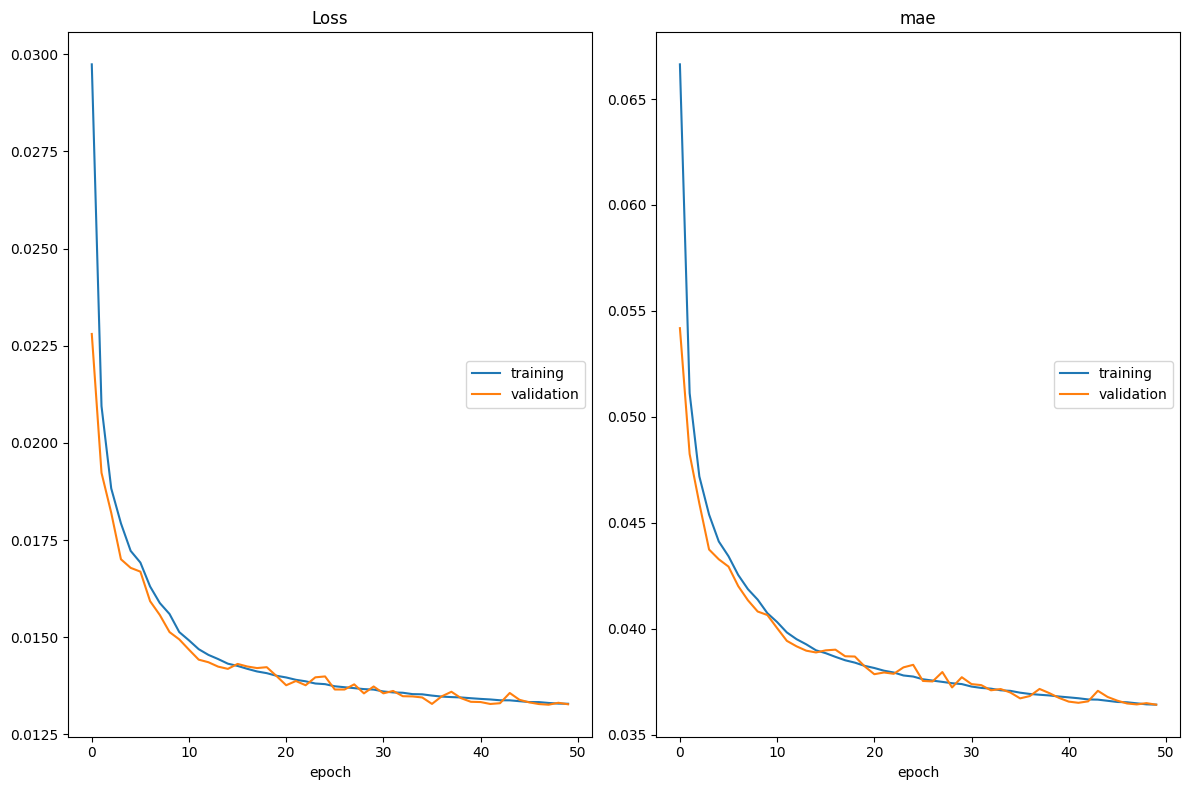

Loss
	training         	 (min:    0.013, max:    0.030, cur:    0.013)
	validation       	 (min:    0.013, max:    0.023, cur:    0.013)
mae
	training         	 (min:    0.036, max:    0.067, cur:    0.036)
	validation       	 (min:    0.036, max:    0.054, cur:    0.036)
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0133 - mae: 0.0364 - val_loss: 0.0133 - val_mae: 0.0364


In [43]:
ae.compile(
    loss='mse',
    metrics='mae',
    optimizer='adam',
)
ae.fit(
    train_data,
    train_data,
    epochs=50,
    batch_size=32,
    validation_data=(test_data,test_data),
    callbacks=[PlotLossesKerasTF()]
)

In [44]:
# Show the encoder in action
from matplotlib import pyplot as plt

In [45]:
encoded_test_imgs = encoder.predict(test_data)
decoded_test_imgs = decoder.predict(encoded_test_imgs)
decoded_test_imgs_alt = ae.predict(test_data)   # img --> encode --> decode == img --> autoencode

313/313 [==============================] - 0s 1ms/step


In [46]:
import random

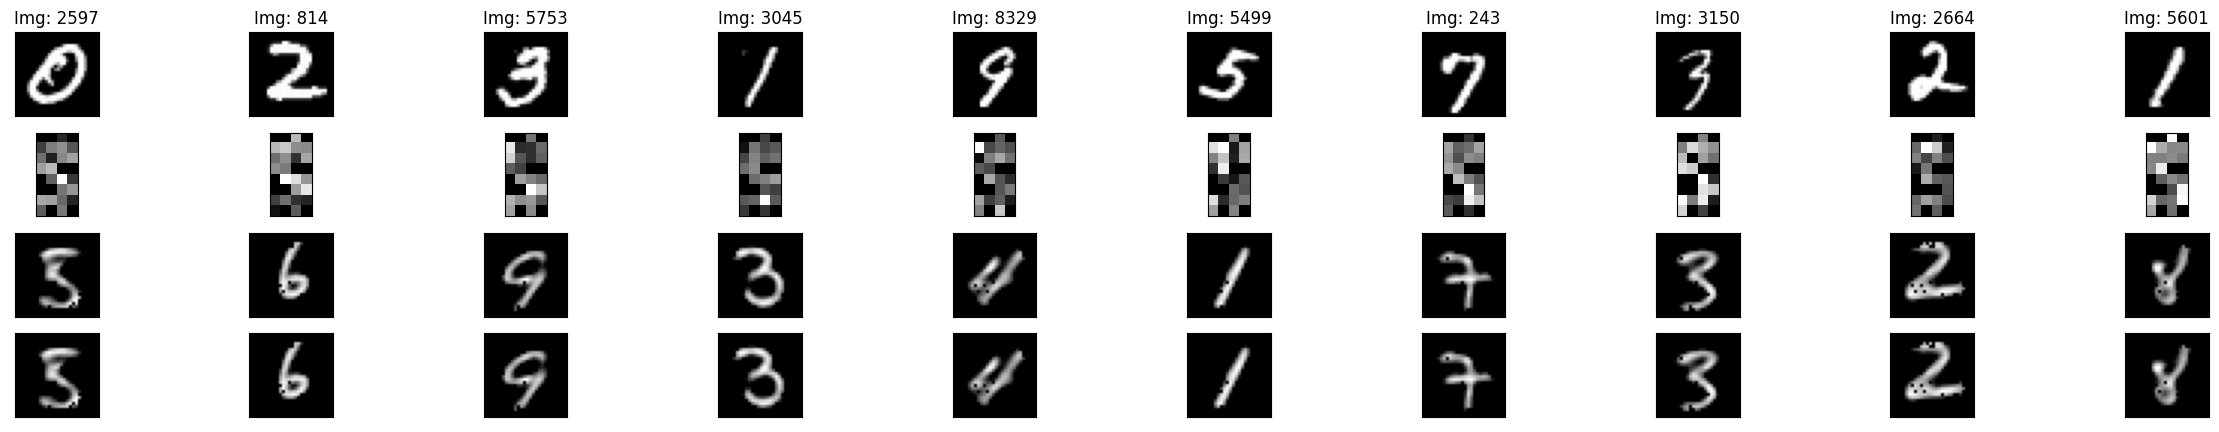

In [47]:
plt.figure(figsize=(60,5))
for i in range(10):
    # display original img
    rand = random.randint(0,10000)
    ax=plt.subplot(4,20,i+1)
    plt.imshow(train_data[rand].reshape(28,28))
    plt.gray()
    plt.title(f'Img: {rand}')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded img
    ax=plt.subplot(4,20,i+1+20)
    plt.imshow(encoded_test_imgs[rand].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display decoded img
    ax=plt.subplot(4,20,i+1+40)
    plt.imshow(decoded_test_imgs[rand].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display alt decoded img
    ax=plt.subplot(4,20,i+1+60)
    plt.imshow(decoded_test_imgs_alt[rand].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)